<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/BUFONJOKER/ml-practice-hands-on-ml-book/blob/master/ch9_UnsupervisedLearningTechniques.ipynb" target="_parent">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"
      style="height:80px; width:auto;"/>
    </a>
  </td>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [3]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [4]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

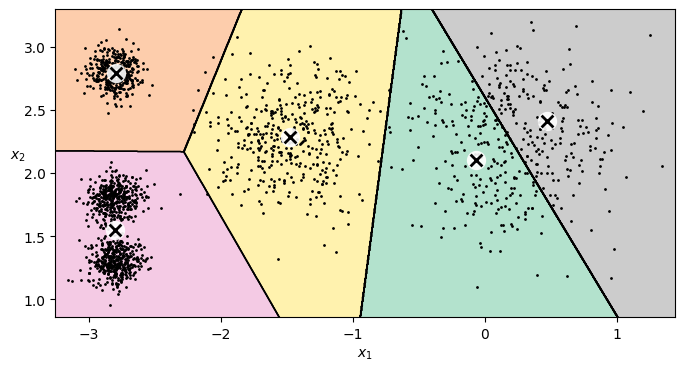

In [7]:
# extra code – this cell generates and saves Figure 9–3

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [8]:
kmeans.transform(X_new).round(2)

array([[0.12, 2.9 , 2.84, 1.5 , 0.63],
       [3.07, 5.85, 5.82, 4.48, 2.56],
       [3.07, 0.29, 1.46, 1.69, 3.52],
       [2.96, 0.36, 0.97, 1.54, 3.47]])

In [9]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [10]:
kmeans.inertia_

211.59853725816828

In [11]:
kmeans.score(X)

-211.59853725816828

In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [13]:
minibatch_kmeans.inertia_

211.65945105712612

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

np.float64(0.655517642572828)

In [15]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [16]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [17]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [29]:
k = 50
kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [30]:
X_representative_digits

array([[ 0.,  0.,  2., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  1.,  9., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  0.,  6., ..., 16.,  3.,  0.],
       [ 0.,  2., 14., ..., 15.,  8.,  0.],
       [ 0.,  0.,  7., ..., 10.,  1.,  0.]])

In [31]:
y_representative_digits = np.array([
     8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
     3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
     5, 6, 5, 7, 3, 1, 0, 8, 4, 7, 
     1, 1, 8, 2, 9, 9, 5, 9, 7, 4, 
     4, 9, 7, 8, 2, 6, 6, 3, 2, 8
])

In [32]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)

LogisticRegression(max_iter=10000)

In [33]:
log_reg.score(X_test, y_test)

0.8387909319899244

In [34]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [37]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8589420654911839

In [39]:
percentile_closest = 99
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [40]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [41]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8564231738035264

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [45]:
X

array([[ 1.15973502, -0.48030611],
       [ 0.82994249,  0.48742097],
       [-0.38634414,  0.88652905],
       ...,
       [ 1.77932735,  0.03346455],
       [ 0.0054592 ,  0.27244833],
       [-0.71647075,  0.63920621]])

In [46]:
y

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

In [47]:
dbscan.labels_

array([ 0,  1,  2,  3,  4,  2,  0,  0,  4,  5,  6,  0,  0,  3,  0,  0,  7,
        0,  0,  0,  3,  8,  0,  7,  3,  0,  3,  9,  2, -1, -1, -1,  5,  3,
        3,  0,  8, -1,  2,  0,  0,  4,  0,  4,  2, -1,  1,  2, -1,  1,  3,
        3,  0,  0,  2,  0,  0,  2,  2,  9,  0,  9,  0,  0,  3,  0,  6,  0,
        9,  7,  2,  5, -1,  0,  9,  5,  3,  3,  3,  2,  9,  0,  0, -1,  0,
        1,  1,  2,  0,  0,  2,  1,  4,  9,  0, 11,  8,  0,  0,  0,  0,  0,
       -1,  5,  1,  2,  9,  7,  5,  3,  0,  1,  4,  0, 10,  2,  2,  3,  9,
        4,  9,  0,  2,  0, -1,  2,  4,  4,  1,  3,  3, -1,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  9,  3,  2, -1,  9,  2,  0,  0,  2,
        0,  9,  3,  4,  4,  3,  0,  1,  3,  1,  1,  2,  0,  0,  0,  9,  3,
        0,  0,  9, -1,  3,  2,  0,  2,  1,  0, -1,  0,  8,  3,  2,  2,  5,
        1,  3,  0,  3,  3,  3,  3,  3,  0, -1, -1,  7,  9,  2, -1,  0,  9,
        3,  5,  0,  9,  0,  3,  8,  9,  9,  3,  6,  0,  3,  0,  3,  6,  0,
        7, -1, -1,  3,  0

In [49]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  34,  35,  36,  38,  39,  40,  41,  42,  46,  47,  50,
        51,  52,  53,  55,  56,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  73,  75,  76,  77,  78,  79,  80,  82,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  97,  98,
        99, 100, 101, 103, 104, 105, 106, 108, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 129,
       130, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 148, 149, 150, 151, 153, 154, 156, 157, 158, 159, 160,
       161, 163, 164, 165, 166, 168, 169, 170, 171, 172, 174, 175, 176,
       177, 178, 179, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 198, 199, 200, 202, 204, 205, 206, 207, 208,
       209, 210, 213, 214, 215, 216, 217, 218, 219, 224, 226, 22

In [50]:
dbscan.components_

array([[ 1.15973502, -0.48030611],
       [ 0.82994249,  0.48742097],
       [-0.38634414,  0.88652905],
       ...,
       [ 1.87524375,  0.09387077],
       [ 0.0054592 ,  0.27244833],
       [-0.71647075,  0.63920621]])

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [52]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([4, 7, 5, 6])

In [53]:
knn.predict_proba(X_new)

array([[0.14, 0.  , 0.04, 0.  , 0.5 , 0.  , 0.  , 0.12, 0.12, 0.  , 0.  ,
        0.08],
       [0.28, 0.  , 0.  , 0.2 , 0.  , 0.  , 0.  , 0.52, 0.  , 0.  , 0.  ,
        0.  ],
       [0.24, 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.58, 0.  , 0.  , 0.42, 0.  ,
        0.  ]])

In [54]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

In [55]:
y_pred[y_dist > 0.2] = -1

In [56]:
y_pred.ravel()

array([-1,  7,  5, -1])

In [ ]:
from sklarn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [59]:
gm.weights_

array([0.5999983, 0.1994995, 0.2005022])

In [60]:
gm.means_

array([[ 0.49964782,  0.24797118],
       [-0.75225984,  0.54948267],
       [ 1.75717611, -0.05116234]])

In [61]:
gm.covariances_

array([[[ 0.17678345, -0.10934137],
        [-0.10934137,  0.29296279]],

       [[ 0.0482712 ,  0.05749364],
        [ 0.05749364,  0.08433698]],

       [[ 0.04929299,  0.05953894],
        [ 0.05953894,  0.08691597]]])

In [62]:
gm.converged_

True

In [63]:
gm.n_iter_

19

In [64]:
gm.predict(X)

array([0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1,
       0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0,

In [66]:
gm.predict_proba(X).round(2)

array([[0.98, 0.  , 0.02],
       [1.  , 0.  , 0.  ],
       [0.19, 0.81, 0.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.99, 0.  ]])

In [67]:
X_new, y_new = gm.sample(6)

In [68]:
X_new

array([[ 0.38400606,  0.80752468],
       [ 0.74623217,  0.49134461],
       [ 0.78190714,  0.76839314],
       [ 1.04157522,  0.16489996],
       [-0.75307749,  0.5379586 ],
       [-0.67005133,  0.59445532]])

In [69]:
y_new

array([0, 0, 0, 0, 1, 1])

In [71]:
gm.score_samples(X).round(2)

array([-2.18, -1.48, -1.34, -2.28, -2.07, -0.42, -1.58, -0.17, -1.6 ,
       -1.53, -0.76, -1.73, -1.65, -2.1 , -1.73, -2.17, -1.58, -1.65,
       -1.46, -0.21, -1.69, -1.42, -2.18, -1.46, -1.49, -1.91, -1.57,
        0.02, -0.48, -0.5 , -1.95, -1.87, -1.71, -2.24, -1.41, -1.8 ,
       -1.01, -3.24, -1.63, -1.21, -1.72, -1.7 , -1.7 , -0.59, -0.84,
       -2.19, -1.87, -0.32, -1.38, -1.76, -1.61, -1.64, -1.57, -1.64,
       -0.03, -1.71, -1.62, -1.81, -0.02, -0.01, -1.49, -0.31, -2.01,
       -0.59, -1.4 , -1.62, -0.87, -1.72, -0.29, -1.49,  0.13, -1.45,
       -1.74, -0.3 , -0.89, -1.8 , -1.75, -1.72, -1.78,  0.  , -0.31,
       -2.05, -2.17, -5.07, -1.54, -1.55, -1.43, -0.04, -1.55, -1.85,
       -0.68, -1.67, -0.85, -0.14, -1.65, -0.27, -1.83, -1.59, -2.02,
       -1.72, -0.15, -1.55, -1.44, -1.53, -1.69, -1.06, -0.04, -1.41,
       -1.37, -1.75, -1.67, -1.66, -1.58, -1.8 , -1.89, -0.08, -1.1 ,
       -1.58,  0.11, -1.54,  0.1 , -1.71, -1.04, -1.71, -1.29, -0.07,
       -1.48, -1.82,

In [72]:
gm.bic(X), gm.aic(X)

(np.float64(2759.6018418388517), np.float64(2676.1700020961553))

In [73]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.19, 0.12, 0.16, 0.16, 0.12, 0.1 , 0.15, 0.  , 0.  , 0.  ])